In [ ]:
pip install statsmodels tensorflow pandas scikit-learn yfinance

In [ ]:
pip install tensorflow

In [ ]:
pip install matplotlib

In [ ]:
import yfinance as yf
import pandas as pd

def download_nasdaq100_data(start_date, end_date):

  # Download the NASDAQ 100 index data
  nasdaq100 = yf.download("^NDX", start=start_date, end=end_date)

  return nasdaq100

if __name__ == "__main__":
  start_date = "2020-01-01"
  end_date = "2024-01-01"
  nasdaq100_data = download_nasdaq100_data(start_date, end_date)
  nasdaq100_data.to_csv("nasdaq100_data.csv")


In [71]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# ฟังก์ชันคำนวณ RSI
def compute_RSI(data, window=14):
    delta = data.diff(1)
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    RS = gain / loss
    RSI = 100 - (100 / (1 + RS))
    return RSI

# โหลดข้อมูล OHLC
data = pd.read_csv('data/nasdaq100_data.csv', parse_dates=['Date'])
data.set_index('Date', inplace=True)

# สร้างตัวชี้วัดทางเทคนิค
data['SMA'] = data['Close'].rolling(window=14).mean()
data['EMA'] = data['Close'].ewm(span=14, adjust=False).mean()
data['RSI'] = compute_RSI(data['Close'])

# เตรียมข้อมูลสำหรับการทำนาย
# สร้างข้อมูล X และ y
X = data[['Open', 'High', 'Low', 'Close', 'SMA', 'EMA', 'RSI']]
y = data['Close'].shift(-1)

# ลบแถวที่มีค่า NaN ออกพร้อมกันใน X และ y
X, y = X.align(y, join='inner', axis=0)

# แยกข้อมูล train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)



In [30]:
from statsmodels.tsa.arima.model import ARIMA

# สร้างโมเดล ARIMA
arima_model = ARIMA(y_train, order=(5, 1, 0))
arima_model_fit = arima_model.fit()

# ทำนายด้วย ARIMA
arima_pred = arima_model_fit.forecast(=len(X_test))
steps

c:\Users\wibun\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\wibun\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\wibun\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\wibun\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is ava

In [40]:
from sklearn.preprocessing import MinMaxScaler

# สเกลข้อมูล input features
scaler_X = MinMaxScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# สเกลข้อมูล target
scaler_y = MinMaxScaler()
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1))

# เตรียมข้อมูลสำหรับ LSTM
X_train_lstm = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_lstm = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# สร้างโมเดล LSTM
lstm_model = tf.keras.Sequential([
    tf.keras.layers.LSTM(50, return_sequences=True, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
    tf.keras.layers.LSTM(50),
    tf.keras.layers.Dense(1)
])

lstm_model.compile(optimizer='adam', loss='mse')
lstm_model.fit(X_train_lstm, y_train_scaled, epochs=20, batch_size=32, verbose=1)

# ทำนายด้วย LSTM
lstm_pred_scaled = lstm_model.predict(X_test_lstm)
lstm_pred = scaler_y.inverse_transform(lstm_pred_scaled)

# ตอนนี้ lstm_pred คือค่าที่ทำนายกลับมาในช่วงที่ไม่ได้สเกลแล้ว


c:\Users\wibun\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.2920
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2502 
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2421 
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2077 
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1992 
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1720 
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1396 
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1090 
Epoch 9/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1000 
Epoch 10/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0943 
Epoch 11/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0921 
Epoch 12/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0968 
Epoch 13/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0984 
Epoch 14/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1036 
Epoch 15/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1043 
Epoch 16/20
4/4 ━━━━━━━━━━━━━━━━━━━

In [41]:
from sklearn.ensemble import RandomForestRegressor

# สร้างโมเดล Random Forest
rf_model = RandomForestRegressor(
    n_estimators=100,          # Number of trees
    max_depth=10,              # Max depth of trees
    min_samples_split=5,       # Min samples required to split an internal node
    min_samples_leaf=2         # Min samples required to be at a leaf node
)
rf_model.fit(X_train, y_train)

# ทำนายด้วย Random Forest
rf_pred = rf_model.predict(X_test)


In [62]:
from sklearn.base import BaseEstimator, RegressorMixin
import numpy as np
import tensorflow as tf

class LSTMRegressor(BaseEstimator, RegressorMixin):
    def __init__(self, model):
        self.model = model
    
    def fit(self, X, y, **kwargs):
        # Ensure X is reshaped for LSTM: (samples, timesteps, features)
        if len(X.shape) == 2:
            X = X.reshape((X.shape[0], 1, X.shape[1]))
        self.model.fit(X, y, **kwargs)
        return self
    
    def predict(self, X):
        # Ensure X is reshaped for LSTM: (samples, timesteps, features)
        if len(X.shape) == 2:
            X = X.reshape((X.shape[0], 1, X.shape[1]))
        return self.model.predict(X)


In [67]:
import numpy as np
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from statsmodels.tsa.arima.model import ARIMA

# Check the shapes of each prediction
print("Shape of ARIMA predictions:", arima_pred_aligned.shape)
print("Shape of LSTM predictions:", lstm_train_pred.shape)
print("Shape of RF predictions:", rf_pred_aligned.shape)

# If shapes are not matching, ensure that all predictions are aligned and have the same length
# Align predictions based on the minimum length
min_length = min(len(arima_pred_aligned), len(lstm_train_pred), len(rf_pred_aligned))

# Align predictions
arima_pred_aligned = arima_pred_aligned[:min_length]
lstm_train_pred = lstm_train_pred[:min_length]
rf_pred_aligned = rf_pred_aligned[:min_length]

# Stack aligned predictions
X_train_stacked = np.column_stack((arima_pred_aligned, lstm_train_pred, rf_pred_aligned))

# Similarly, align and stack test predictions
arima_pred_test_aligned = arima_pred_test_aligned[:min_length]
lstm_test_pred_aligned = lstm_test_pred[:min_length]
rf_pred_test_aligned = rf_pred_test_aligned[:min_length]

X_test_stacked = np.column_stack((arima_pred_test_aligned, lstm_test_pred_aligned, rf_pred_test_aligned))

# Create and fit the stacking model
stacked_model = StackingRegressor(
    estimators=[
        ('arima', arima_regressor),
        ('rf', rf_model)
    ],
    final_estimator=LinearRegression()
)

# Fit the stacked model
stacked_model.fit(X_train_stacked, y_train[:min_length])

# Predict using the ensemble model
ensemble_pred = stacked_model.predict(X_test_stacked)


Shape of ARIMA predictions: (20,)
Shape of LSTM predictions: (100, 1)
Shape of RF predictions: (20,)


c:\Users\wibun\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


Mean Squared Error of the Ensemble Model: 0.08597258675124572


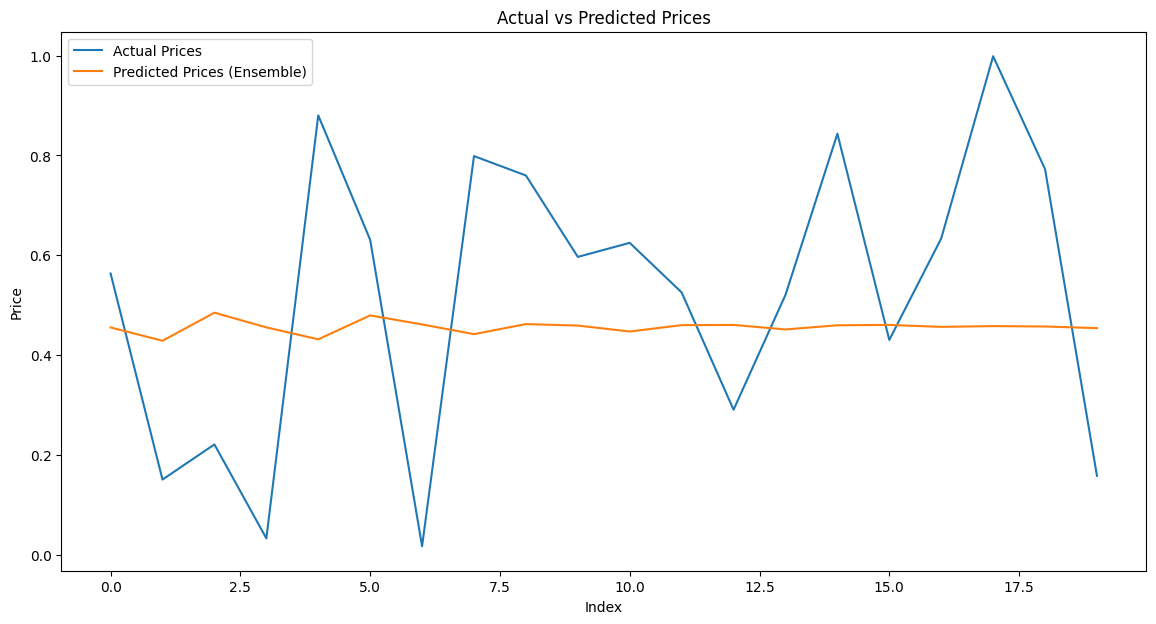

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Convert NumPy arrays to Pandas Series
y_test_series = pd.Series(y_test)
ensemble_pred_series = pd.Series(ensemble_pred)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test_series, ensemble_pred_series)
print(f'Mean Squared Error of the Ensemble Model: {mse}')

# Plot results
plt.figure(figsize=(14, 7))
plt.plot(y_test_series.index, y_test_series.values, label='Actual Prices')
plt.plot(ensemble_pred_series.index, ensemble_pred_series.values, label='Predicted Prices (Ensemble)')
plt.legend()
plt.xlabel('Index')
plt.ylabel('Price')
plt.title('Actual vs Predicted Prices')
plt.show()
